In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# CSV 파일 불러오기
data = pd.read_csv("../merged_dataset/double_train/double_train.csv")
test_data = pd.read_csv("../extracted_keypoints/quickly_test/sj_type2_7.csv")

In [3]:
# 'Frame'열을 제외한 모든 열 선택
feature_columns = data.columns[1:-1]

# 입력 데이터(X)와 레이블(Y) 분리
X = data[feature_columns].values
Y = data['Label'].values

X_test = test_data[feature_columns].values
Y_test = test_data['Label'].values



# standardscaler로 데이터 정규화
scaler = StandardScaler()
scaler_test = StandardScaler()


X = scaler.fit_transform(X)
X_test = scaler_test.fit_transform(X_test)


X=X.astype(int)
Y=Y.astype(int)

X_test=X_test.astype(int)
Y_test=Y_test.astype(int)

C:\Users\KJW\AppData\Local\Temp\ipykernel_9716\1860177343.py:22: RuntimeWarning: invalid value encountered in cast
  X=X.astype(int)


In [4]:
# train-valid 데이터 분할 (80%, 20%)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
model = LogisticRegression()

In [6]:
# 모델들 학습 및 평가

model.fit(X, Y)
Y_prob = model.predict_proba(X_test)[:, 1]  
auc_score = roc_auc_score(Y_test, Y_prob)

# 임계값 설정
threshold = 0.5  # 예측된 확률이 0.5 이상이면 클래스를 1로 예측

# 예측된 확률을 클래스 레이블로 변환
Y_pred_binary = (Y_prob >= threshold).astype(int)

# Precision 계산
precision = precision_score(Y_test, Y_pred_binary)

# Recall 계산
recall = recall_score(Y_test, Y_pred_binary)

In [7]:
# 결과 출력
print("Precision:", precision)
print("Recall:", recall)
print(f"AUC score : {auc_score}")

Precision: 0.8142857142857143
Recall: 0.8028169014084507
AUC score : 0.917636252296387


In [8]:
# 테스트 데이터에 대한 예측 결과를 얻기 위해 모델 사용
predictions = model.predict_proba(X_test)[:,1]

# 이동 평균을 계산하여 예측값 부드럽게 만들기
smoothed_predictions = np.convolve(predictions.squeeze(), np.ones(6)/6, mode='same')

# 테스트 데이터에 대한 예측 결과를 바이너리 형태로 변환
binary_predictions = (smoothed_predictions > 0.5).astype(int)

In [9]:
# 0에서 1로 바뀌는 구간에서 줄넘기 개수 카운트
jump_count = np.sum(np.diff(binary_predictions.flatten()) > 0)

In [10]:
# 테스트 데이터의 점프수
print(f'Predicted Jump Count: {jump_count}')


Predicted Jump Count: 8


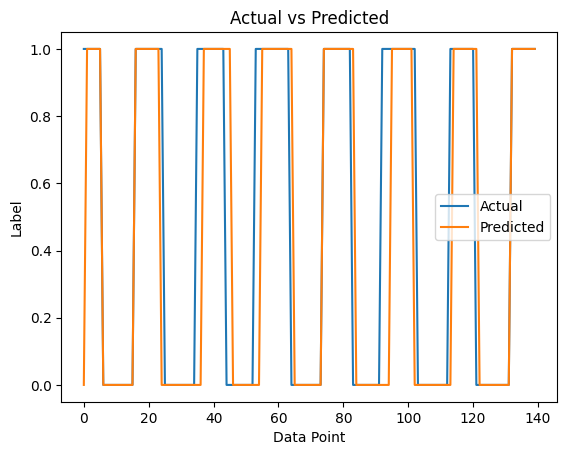

In [11]:
# 테스트 데이터 1에 대한 예측 결과

plt.plot(Y_test, label='Actual')
plt.plot(binary_predictions.flatten(), label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Data Point')
plt.ylabel('Label')
plt.legend()
plt.show()

In [12]:
# 학습된 모델의 계수 확인
coef = model.coef_[0]
intercept = model.intercept_

In [13]:
# Odd ratio 계산
odds_ratio = np.exp(coef)
print("Odd ratio:", np.round(odds_ratio,2))

Odd ratio: [1.69 1.47 1.47 2.72 1.27 8.03 0.84 2.79 1.31 6.23 0.88 0.23 0.91 1.02
 0.72 4.05 1.08 1.2  0.48 0.79 0.72 0.53 0.8  1.62 0.82 1.33 4.81]


In [14]:
for i, name in enumerate(feature_columns):
    print("Feature:", name)
    print("Odd ratio:", np.round(odds_ratio[i],2))
    print("----------------------------------------")

Feature: Head
Odd ratio: 1.69
----------------------------------------
Feature: Neck
Odd ratio: 1.47
----------------------------------------
Feature: RShoulder_X
Odd ratio: 1.47
----------------------------------------
Feature: RShoulder_Y
Odd ratio: 2.72
----------------------------------------
Feature: LShoulder_X
Odd ratio: 1.27
----------------------------------------
Feature: LShoulder_Y
Odd ratio: 8.03
----------------------------------------
Feature: RElbow_X
Odd ratio: 0.84
----------------------------------------
Feature: RElbow_Y
Odd ratio: 2.79
----------------------------------------
Feature: LElbow_X
Odd ratio: 1.31
----------------------------------------
Feature: LElbow_Y
Odd ratio: 6.23
----------------------------------------
Feature: RWrist_X
Odd ratio: 0.88
----------------------------------------
Feature: RWrist_Y
Odd ratio: 0.23
----------------------------------------
Feature: LWrist_X
Odd ratio: 0.91
----------------------------------------
Feature: LWrist_Y
Odd

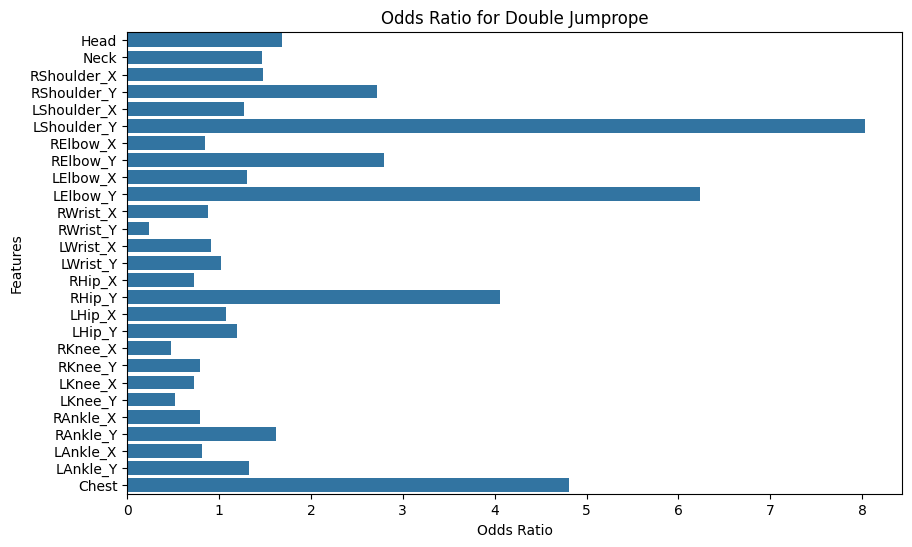

In [16]:
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=odds_ratio, y=feature_columns)
plt.xlabel('Odds Ratio')
plt.ylabel('Features')
plt.title('Odds Ratio for Double Jumprope')
plt.show()